In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
labels_df = pd.read_csv('/content/drive/My Drive/CNN Project 2/labels.csv.zip')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


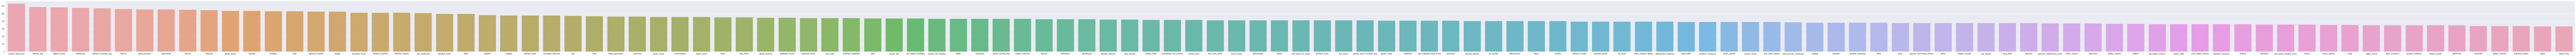

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (250,5))
breed_cnt = labels_df['breed'].value_counts()
sns.barplot(breed_cnt.index, breed_cnt.values, alpha=0.8)
plt.show()

Due to repeated Colab crashes when dealing with entire 120 classes for data augmentation,  we will pick up the top 16 classes from this dataset to do this project

In [0]:
sublist = []
sublist = breed_cnt.index[0:16]
sublist

Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed', 'tibetan_terrier', 'airedale', 'leonberg',
       'cairn', 'japanese_spaniel', 'beagle'],
      dtype='object')

In [0]:
for i in range(len(labels_df)):
  label_short_df = labels_df[labels_df['breed'].isin(sublist)]

In [0]:
import os
X = []
os.chdir('/content/drive/My Drive/CNN Project 2/train/train')
import cv2
for idx, data in label_short_df.iterrows():
    dummy = cv2.imread('/content/drive/My Drive/CNN Project 2/train/train/' + data.id + '.jpg')
    print(idx)
    dummy = cv2.resize(dummy,(224,224))
    X.append(dummy)

8
9
12
29
48
57
70
79
80
88
90
102
105
111
115
118
122
141
144
146
149
157
161
164
165
174
201
217
219
223
226
229
230
231
233
235
237
238
242
255
262
265
268
271
276
287
288
289
293
301
303
306
310
325
326
329
333
335
351
354
357
360
362
371
377
379
387
392
397
407
408
411
427
432
437
442
451
453
460
461
479
480
484
486
488
489
508
509
510
515
521
524
542
543
546
553
555
561
563
568
575
576
588
591
597
599
600
609
611
613
616
619
620
625
628
648
653
654
662
663
666
668
686
694
695
697
700
706
721
723
732
734
738
744
746
750
751
763
766
773
777
782
783
785
802
807
809
815
823
828
831
834
841
842
846
851
860
871
880
887
892
893
895
912
913
916
932
954
957
965
976
977
980
987
1003
1014
1017
1037
1047
1062
1068
1070
1071
1075
1077
1078
1103
1124
1127
1133
1140
1143
1145
1148
1162
1165
1169
1171
1177
1182
1187
1191
1199
1200
1201
1206
1209
1219
1223
1230
1233
1235
1238
1243
1244
1255
1260
1263
1279
1293
1294
1295
1302
1309
1310
1319
1321
1324
1327
1328
1329
1343
1377
1388
1390
1395
1405
14

In [0]:
import numpy as np
X_arr = np.asarray(X)
np.save('/content/drive/My Drive/CNN Project 2/X_arr_short.npy', X_arr)

Saving train images upload to a numpy array so that it can be reused in subsequent sessions

In [0]:
import keras
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_breed = le.fit_transform(label_short_df['breed'])
y_breed_arr = keras.utils.to_categorical(y_breed, num_classes=16)

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X_arr,
	y_breed_arr, test_size=0.2, random_state=1)

In [0]:
print(trainX.shape)
print(testX.shape)

(1421, 224, 224, 3)
(356, 224, 224, 3)


In [0]:
trainX = trainX.reshape(trainX.shape[0], 224, 224, 3).astype('float32')
trainX /=255

testX = testX.reshape(testX.shape[0], 224, 224, 3).astype('float32')
testX /=255

Transfer learning using VGG16

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model1=VGG16(weights=('imagenet'),
#base_model1=VGG16(weights=('/content/drive/My Drive/CNN Project 2/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top= False, pooling = 'avg', input_shape=(224,224,3))

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
#train_vgg_bf = base_model1.predict_generator(train_datagen.flow(trainX, trainY, batch_size=32), steps=500, verbose=1)
train_vgg_bf = base_model1.predict(trainX, batch_size=32, verbose=1)

1421/1421 [==============================] - 13s 9ms/step


In [0]:
#val_vgg_bf = base_model1.predict_generator(val_datagen.flow(testX, testY, batch_size=32), steps=500, verbose=1)
valid_vgg_bf = base_model1.predict(testX, batch_size=32, verbose=1)

356/356 [==============================] - 3s 9ms/step


In [0]:
train_vgg_bf.shape

(1421, 512)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1)
logreg.fit(train_vgg_bf, (trainY* range(16)).sum(axis=1))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import log_loss, accuracy_score
valid_probs = logreg.predict_proba(valid_vgg_bf)
valid_preds = logreg.predict(valid_vgg_bf)
print('Validation VGG LogLoss {}'.format(log_loss(testY, valid_probs)))
print('Validation VGG Accuracy {}'.format(accuracy_score((testY * range(16)).sum(axis=1), valid_preds)))

Validation VGG LogLoss 1.1081625846594088
Validation VGG Accuracy 0.6713483146067416


With Data Augmentation, lets look at the accuracy

In [0]:
import os
X = []
os.chdir('/content/drive/My Drive/CNN Project 2/train/train')
import cv2
for idx, data in label_short_df.iterrows():
    dummy = cv2.imread('/content/drive/My Drive/CNN Project 2/train/train/' + data.id + '.jpg')
    print(idx)
    dummy = cv2.resize(dummy,(224,224))
    X.append(dummy)

In [0]:
#x_train = np.zeros((len(label_short_df), 224, 224, 3), dtype='float32')
x_train = []
import cv2
for idx, data in label_short_df.iterrows():
    dummy = cv2.imread('/content/drive/My Drive/CNN Project 2/train/train/' + data.id + '.jpg')
    dummy = cv2.resize(dummy,(224,224))
    x = preprocess_input(dummy)
    print(idx)
    x_train.append(x)
#print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

8
9
12
29
48
57
70
79
80
88
90
102
105
111
115
118
122
141
144
146
149
157
161
164
165
174
201
217
219
223
226
229
230
231
233
235
237
238
242
255
262
265
268
271
276
287
288
289
293
301
303
306
310
325
326
329
333
335
351
354
357
360
362
371
377
379
387
392
397
407
408
411
427
432
437
442
451
453
460
461
479
480
484
486
488
489
508
509
510
515
521
524
542
543
546
553
555
561
563
568
575
576
588
591
597
599
600
609
611
613
616
619
620
625
628
648
653
654
662
663
666
668
686
694
695
697
700
706
721
723
732
734
738
744
746
750
751
763
766
773
777
782
783
785
802
807
809
815
823
828
831
834
841
842
846
851
860
871
880
887
892
893
895
912
913
916
932
954
957
965
976
977
980
987
1003
1014
1017
1037
1047
1062
1068
1070
1071
1075
1077
1078
1103
1124
1127
1133
1140
1143
1145
1148
1162
1165
1169
1171
1177
1182
1187
1191
1199
1200
1201
1206
1209
1219
1223
1230
1233
1235
1238
1243
1244
1255
1260
1263
1279
1293
1294
1295
1302
1309
1310
1319
1321
1324
1327
1328
1329
1343
1377
1388
1390
1395
1405
14

In [0]:
import numpy as np
X_arr = np.asarray(x_train)

In [0]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(X_arr,
	y_breed_arr, test_size=0.2, random_state=10)

In [0]:
train_vgg_bf = base_model1.predict(trainX, batch_size=32, verbose=1)

1421/1421 [==============================] - 13s 9ms/step


In [0]:
valid_vgg_bf = base_model1.predict(testX, batch_size=32, verbose=1)

356/356 [==============================] - 3s 9ms/step


In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1)
logreg.fit(train_vgg_bf, (trainY* range(16)).sum(axis=1))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import log_loss, accuracy_score
valid_probs = logreg.predict_proba(valid_vgg_bf)
valid_preds = logreg.predict(valid_vgg_bf)
print('Validation VGG LogLoss {}'.format(log_loss(testY, valid_probs)))
print('Validation VGG Accuracy {}'.format(accuracy_score((testY * range(16)).sum(axis=1), valid_preds)))

Validation VGG LogLoss 0.4207591029942321
Validation VGG Accuracy 0.8960674157303371
